# CIFAR10 with different CNN architecture
<img src='https://images.prismic.io/encord/52bcd8ad-b25a-4225-ba5d-6b3f6a97e424_CNN+timeline.png?auto=compress,format'>

# **Importing Necessary Libraries**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Loading CIFAR-10 dataset**

In [ ]:
# Load CIFAR-10 dataset
(train_images, y_train), (test_images, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# Exploring Dataset

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# reshaping train y_train
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
num_classes = len(classes)
num_classes

10

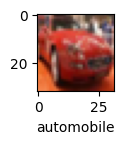

In [ ]:
plt.figure(figsize =(1,1))
plt.imshow(train_images[5])
plt.xlabel(classes[y_train[5]])
plt.show()

In [ ]:
print(train_images.shape, y_train.shape, test_images.shape, y_test.shape )

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# **Normalization :**

In [ ]:
# Normalize pixel values to the range [0, 1]
X_train = train_images.astype('float32') / 255.0
X_test = test_images.astype('float32') / 255.0

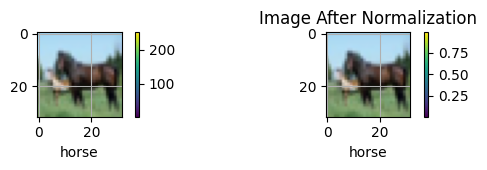

In [ ]:
idx = 12
plt.figure(figsize=(6,1.8))
plt.subplot(1, 2, 1)
plt.imshow(train_images[idx])
class_name = classes[y_train[idx]]
plt.xlabel(class_name)
plt.colorbar()
plt.grid(True)

plt.subplot(1,2,2)
plt.imshow(X_train[idx])
class_name = classes[y_train[idx]]
plt.xlabel(class_name)
plt.colorbar()
plt.grid(True)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

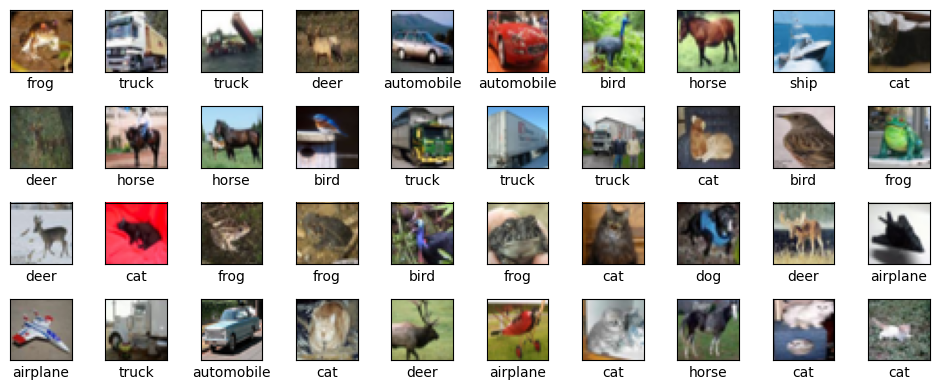

In [ ]:
# Visualising array of pictures
plt.figure(figsize=(10,4))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

    class_name = classes[y_train[i]]
    plt.xlabel(class_name)
    plt.tight_layout()
plt.show()

In [ ]:
def image_evaluation(model,calsses, X_test, y_test):
    y_pred_model = model.predict(X_test)
    y_pred = np.argmax(y_pred_model, axis=1)

    fig, ax = plt.subplots(5,8, figsize=(14,8))
    ax = ax.ravel()
    for i in range(0,40):
        ax[i].imshow(X_test[i])
        class_name_true = classes[y_test.reshape(-1,)[i]]
        class_name_pred = classes[y_pred[i]]
        ax[i].set_title(f'True : {class_name_true}, \nPredict : {class_name_pred}')
    plt.tight_layout()
    plt.show()


# **Building CNN Model**

In [ ]:
input_shape =(32,32,3)
num_classes =len(classes)

In [ ]:
cnn = Sequential([
    Conv2D(32, kernel_size=(5,5),activation = 'relu',input_shape =input_shape),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Conv2D(64, kernel_size =(5,5),padding='same', activation = 'relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation ='relu'),
    Dropout(0.5),
    Dense(128, activation ='relu'),
    Dropout(0.5),
    Dense(num_classes, activation ='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
! pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 16.4 MB/s eta 0:00:00


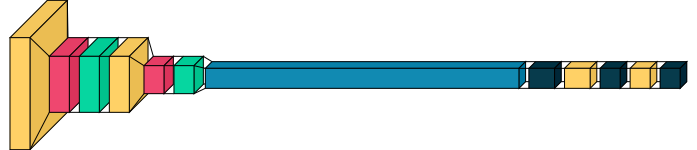

In [ ]:
visualkeras.layered_view(cnn)

In [ ]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
cnn.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [ ]:
cnn.fit(X_train, y_train, epochs = 10, batch_size= 256, validation_data= (X_test, y_test))

Epoch 1/10
196/196 [==============================] - 20s 24ms/step - loss: 1.8826 - accuracy: 0.3470 - val_loss: 3.4422 - val_accuracy: 0.1169
Epoch 2/10
196/196 [==============================] - 2s 13ms/step - loss: 1.4056 - accuracy: 0.5015 - val_loss: 3.8627 - val_accuracy: 0.1247
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 1.2138 - accuracy: 0.5774 - val_loss: 1.4430 - val_accuracy: 0.5036
Epoch 4/10
196/196 [==============================] - 2s 11ms/step - loss: 1.0836 - accuracy: 0.6228 - val_loss: 1.4799 - val_accuracy: 0.5011
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 0.9754 - accuracy: 0.6609 - val_loss: 1.0864 - val_accuracy: 0.6259
Epoch 6/10
196/196 [==============================] - 3s 13ms/step - loss: 0.8973 - accuracy: 0.6908 - val_loss: 0.9975 - val_accuracy: 0.6590
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 0.8263 - accuracy: 0.7165 - val_loss: 1.0596 - val_accuracy: 0.655

<Figure size 300x200 with 0 Axes>

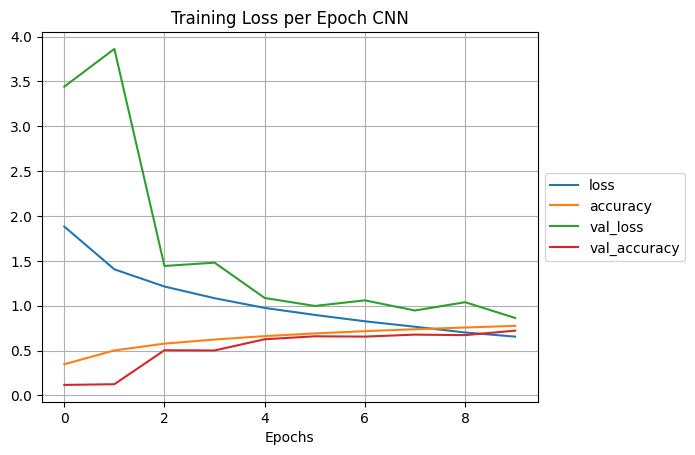

In [ ]:
history_cnn = pd.DataFrame(cnn.history.history)
plt.figure(figsize=(3, 2))
history_cnn.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch CNN')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# **Prediction by the Model**

Image Prediction
313/313 [==============================] - 1s 3ms/step


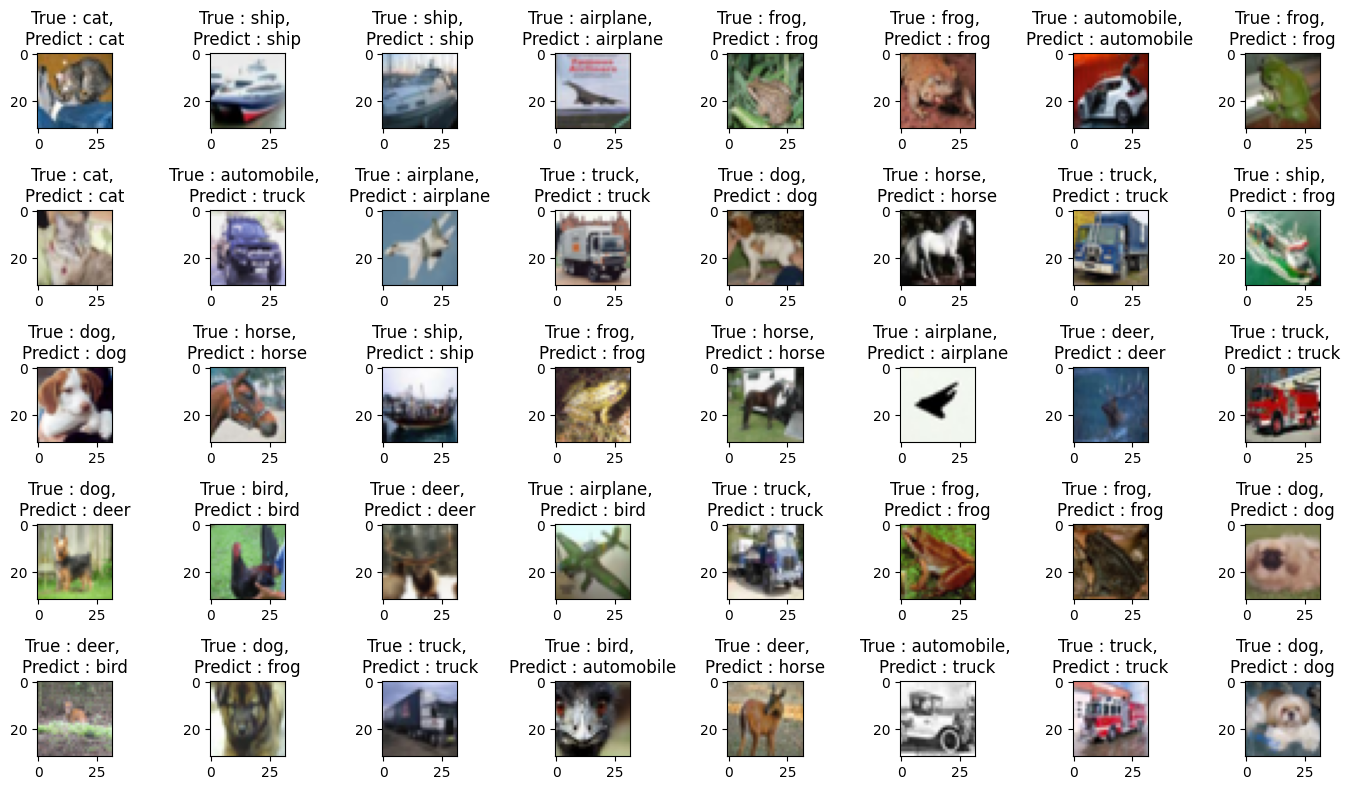

In [ ]:
print("Image Prediction")
image_evaluation(cnn, classes, X_test, y_test)

# **Evaluation of the model**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8634 - accuracy: 0.7220


[0.8633778095245361, 0.722000002861023]

# **LeNet - 5**
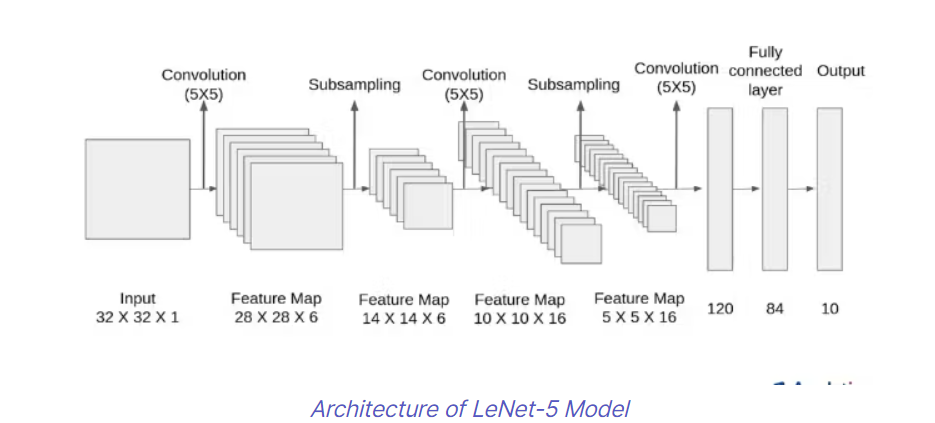

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

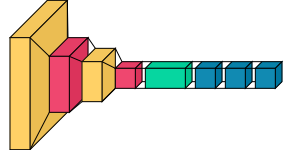

In [ ]:
LeNet5  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# summary
LeNet5.summary()
visualkeras.layered_view(LeNet5)

In [ ]:
LeNet5.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [ ]:
LeNet5.fit(X_train, y_train, epochs = 10, batch_size= 64, validation_data= (X_test, y_test))

Epoch 1/10
782/782 [==============================] - 10s 7ms/step - loss: 1.7107 - accuracy: 0.3801 - val_loss: 1.4918 - val_accuracy: 0.4602
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 1.4401 - accuracy: 0.4822 - val_loss: 1.3891 - val_accuracy: 0.4989
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3358 - accuracy: 0.5229 - val_loss: 1.2970 - val_accuracy: 0.5340
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2567 - accuracy: 0.5534 - val_loss: 1.2812 - val_accuracy: 0.5402
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1847 - accuracy: 0.5823 - val_loss: 1.1793 - val_accuracy: 0.5823
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1253 - accuracy: 0.6044 - val_loss: 1.2445 - val_accuracy: 0.5663
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0816 - accuracy: 0.6197 - val_loss: 1.1289 - val_accuracy: 0.6091
Epoch

<Figure size 300x200 with 0 Axes>

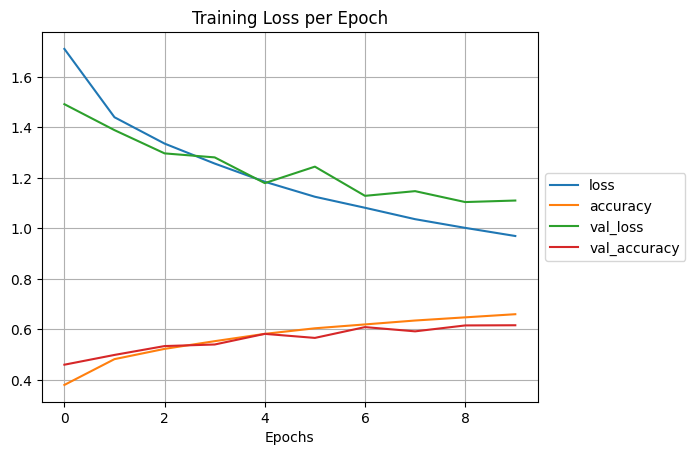

In [ ]:
history_LeNet = pd.DataFrame(LeNet5.history.history)
plt.figure(figsize=(3, 2))
history_LeNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
print("Image Prediction")
image_evaluation(LeNet5, classes, X_test, y_test)

Image Prediction
313/313 [==============================] - 1s 2ms/step


# **AlexNet* (modified)**

In [ ]:
AlexNet = Sequential([
    Conv2D(96, kernel_size=(3, 3), strides=4, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the output size for your dataset
])


AlexNet.summary()
visualkeras.layered_view(AlexNet)

In [ ]:
# Compile the model
AlexNet.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [ ]:
AlexNet.fit(X_train, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test, y_test_cat))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
history_AlexNet = pd.DataFrame(AlexNet.history.history)
plt.figure(figsize=(3, 2))
history_AlexNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
print("Image Prediction")
image_evaluation(AlexNet, classes, X_test, y_test)

In [ ]:
def image_evaluation(model, classes, X_test, y_test):
    y_pred_model = model.predict(X_test)
    y_pred = np.argmax(y_pred_model, axis=1)

    fig, axes = plt.subplots(5, 8, figsize=(14, 8))
    for i in range(0, 40):
        plt.subplot(5, 8, i + 1)
        plt.imshow(X_test[i])
        class_name_true = classes[y_test.reshape(-1,)[i]]
        class_name_pred = classes[y_pred[i]]
        plt.title(f'True: {class_name_true}\nPredict: {class_name_pred}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Image Prediction")
image_evaluation(AlexNet, classes, X_test, y_test)

# **Pretrained model (Transfer Learning)**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50,  InceptionV3, MobileNet


def pretrained_model(model, X_train, y_train, X_test, y_test,classes) :
    #model
    base_model = model(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


    # Train the model
    history = model.fit(X_train, y_train, batch_size=64,epochs=5,
                    validation_data=(X_test, y_test))
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(3, 2))
    history.plot()
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('')
    plt.title(f'Training Loss per Epoch')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print(f'Test accuracy: {test_acc}')

    print("Image Prediction")
    image_evaluation(model, classes, X_test, y_test)



def pretrained_aug_model(model, X_train, y_train, X_test, y_test,classes) :
    #model
    base_model = model(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#============================================
# Data augmentation
#============================================
    datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    )
    datagen.fit(X_train)
#=============================================

    # Train the model
    history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=10,
                    validation_data=(X_test, y_test))
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(3, 2))
    history.plot()
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('')
    plt.title(f'Training Loss per Epoch')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print(f'Test accuracy: {test_acc}')

    print("Image Prediction")
    image_evaluation(model, classes, X_test, y_test)



# **VGG16**
![image.png](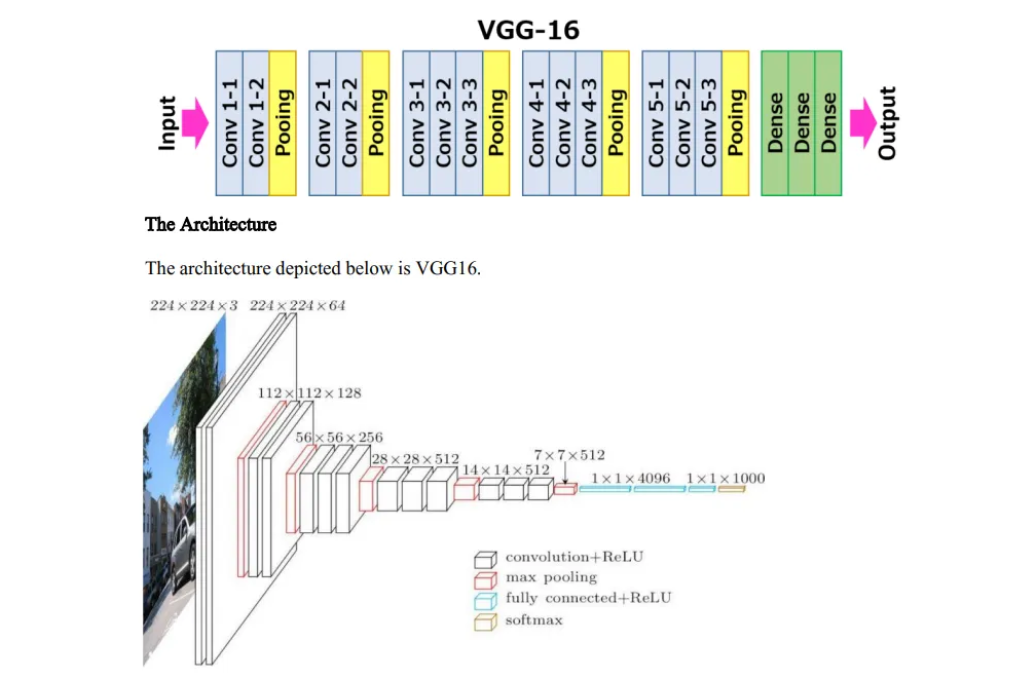![image.png](data:image/png;base64,))

Epoch 1/5
782/782 [==============================] - 36s 40ms/step - loss: 1.8069 - accuracy: 0.2696 - val_loss: 1.5400 - val_accuracy: 0.3725
Epoch 2/5
782/782 [==============================] - 29s 37ms/step - loss: 1.4180 - accuracy: 0.4375 - val_loss: 1.3142 - val_accuracy: 0.4880
Epoch 3/5
782/782 [==============================] - 30s 38ms/step - loss: 1.1246 - accuracy: 0.5883 - val_loss: 1.1516 - val_accuracy: 0.6060
Epoch 4/5
782/782 [==============================] - 29s 37ms/step - loss: 0.9285 - accuracy: 0.6736 - val_loss: 0.9182 - val_accuracy: 0.6840
Epoch 5/5
782/782 [==============================] - 29s 37ms/step - loss: 0.7796 - accuracy: 0.7292 - val_loss: 0.8604 - val_accuracy: 0.7187


<Figure size 300x200 with 0 Axes>

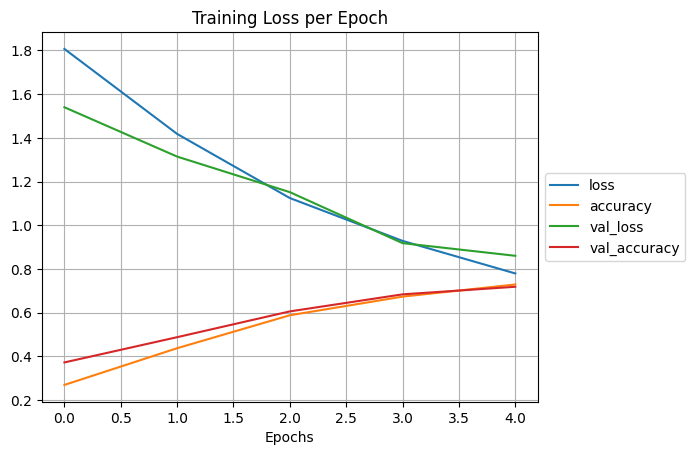

313/313 - 2s - loss: 0.8604 - accuracy: 0.7187 - 2s/epoch - 8ms/step
Test accuracy: 0.7186999917030334
Image Prediction
313/313 [==============================] - 2s 7ms/step


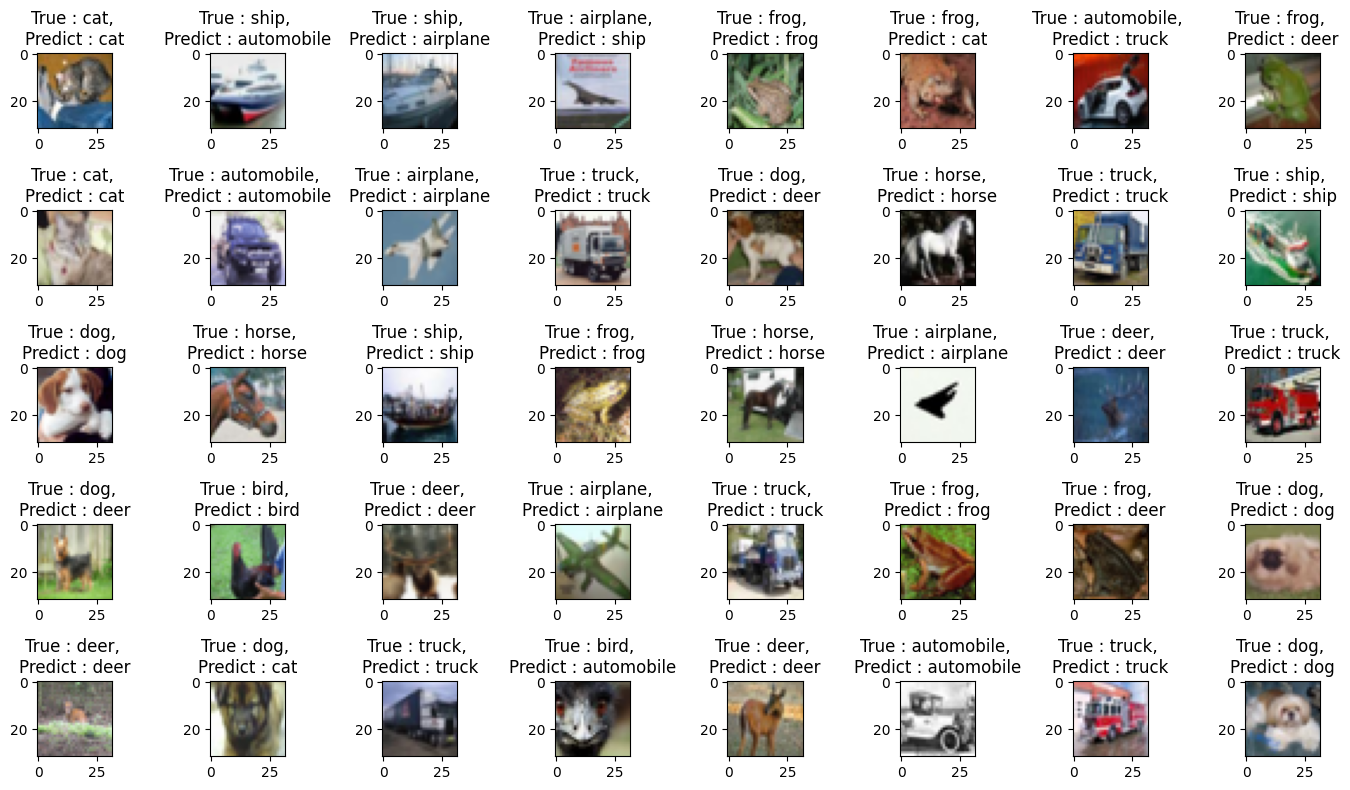

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

#base_model.trainable = False

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64,epochs=5,
                    validation_data=(X_test, y_test))
history = pd.DataFrame(model.history.history)
plt.figure(figsize=(3, 2))
history.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

print("Image Prediction")
image_evaluation(model, classes, X_test, y_test)





# ResNet50
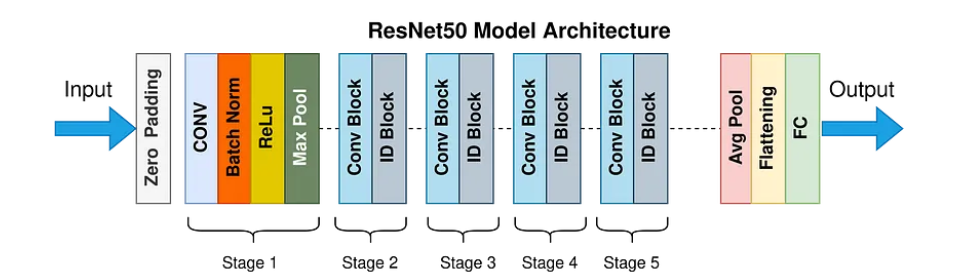

Epoch 1/5
782/782 [==============================] - 73s 48ms/step - loss: 1.1201 - accuracy: 0.6281 - val_loss: 1.5470 - val_accuracy: 0.4787
Epoch 2/5
782/782 [==============================] - 36s 46ms/step - loss: 0.7883 - accuracy: 0.7404 - val_loss: 1.1404 - val_accuracy: 0.6199
Epoch 3/5
782/782 [==============================] - 35s 45ms/step - loss: 0.6322 - accuracy: 0.7914 - val_loss: 1.1763 - val_accuracy: 0.6341
Epoch 4/5
782/782 [==============================] - 37s 47ms/step - loss: 0.5984 - accuracy: 0.8035 - val_loss: 0.8200 - val_accuracy: 0.7276
Epoch 5/5
782/782 [==============================] - 35s 45ms/step - loss: 0.4718 - accuracy: 0.8407 - val_loss: 0.8838 - val_accuracy: 0.7274


<Figure size 300x200 with 0 Axes>

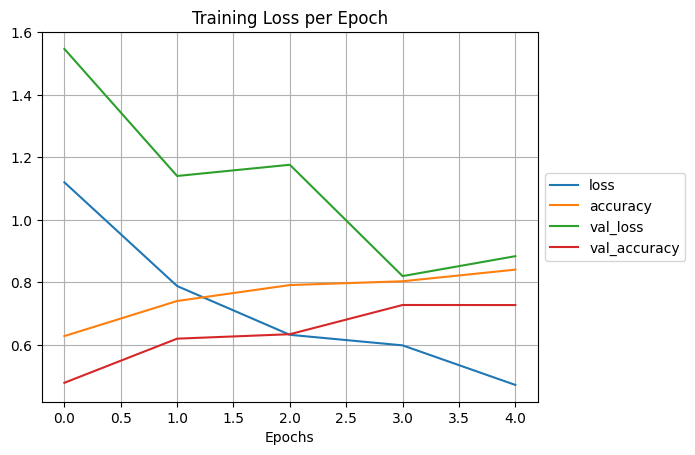

313/313 - 3s - loss: 0.8838 - accuracy: 0.7274 - 3s/epoch - 11ms/step
Test accuracy: 0.727400004863739
Image Prediction
313/313 [==============================] - 4s 9ms/step


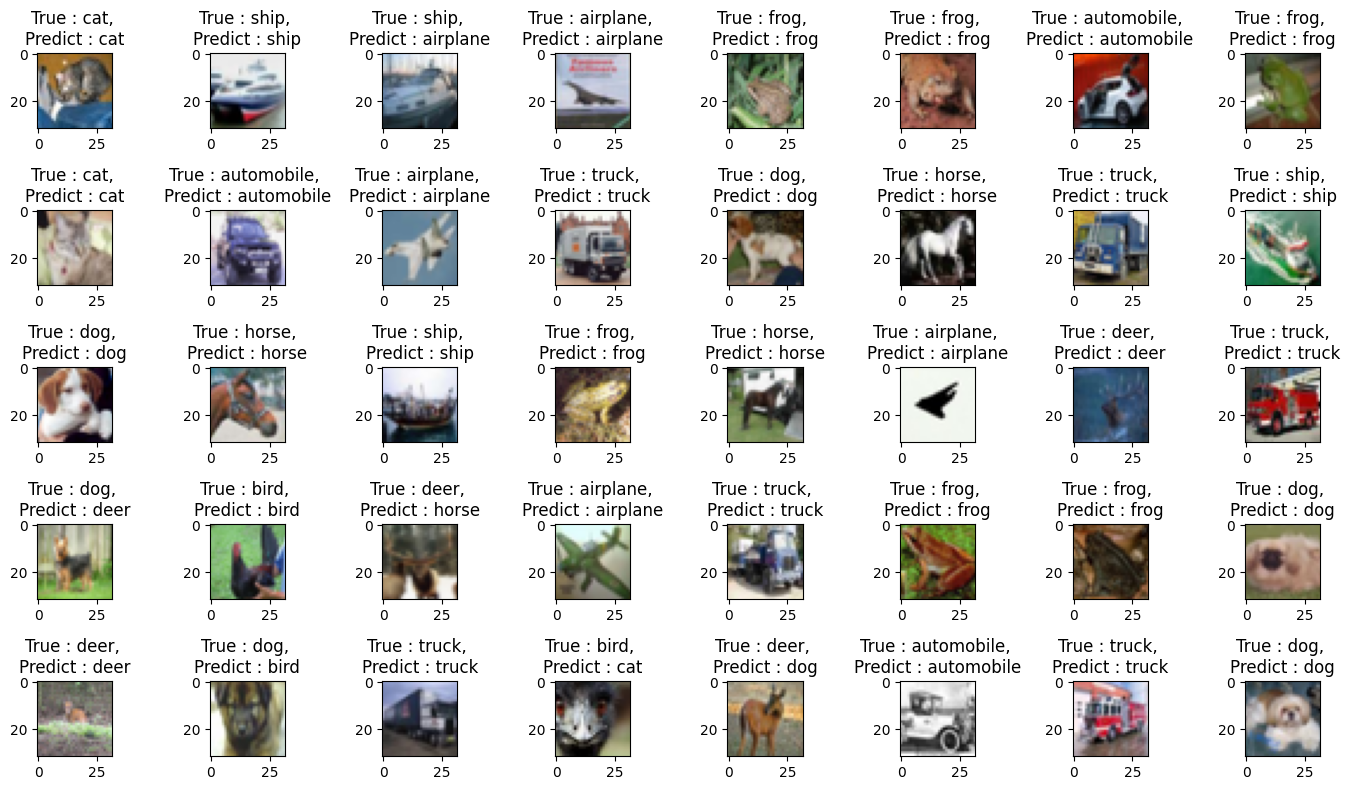

In [ ]:
pretrained_model(ResNet50, X_train, y_train, X_test, y_test,classes)

Epoch 1/10
391/391 [==============================] - 83s 116ms/step - loss: 1.1841 - accuracy: 0.5972 - val_loss: 2.7625 - val_accuracy: 0.1487
Epoch 2/10
391/391 [==============================] - 41s 105ms/step - loss: 0.8152 - accuracy: 0.7238 - val_loss: 2.5606 - val_accuracy: 0.3324
Epoch 3/10
391/391 [==============================] - 41s 104ms/step - loss: 0.7117 - accuracy: 0.7585 - val_loss: 0.8447 - val_accuracy: 0.7294
Epoch 4/10
391/391 [==============================] - 44s 112ms/step - loss: 0.6620 - accuracy: 0.7755 - val_loss: 1.1589 - val_accuracy: 0.6700
Epoch 5/10
391/391 [==============================] - 43s 111ms/step - loss: 0.6234 - accuracy: 0.7887 - val_loss: 0.8130 - val_accuracy: 0.7242
Epoch 6/10
391/391 [==============================] - 43s 110ms/step - loss: 0.5902 - accuracy: 0.7978 - val_loss: 0.9168 - val_accuracy: 0.7109
Epoch 7/10
391/391 [==============================] - 43s 110ms/step - loss: 0.5523 - accuracy: 0.8127 - val_loss: 0.7492 - val_ac

<Figure size 300x200 with 0 Axes>

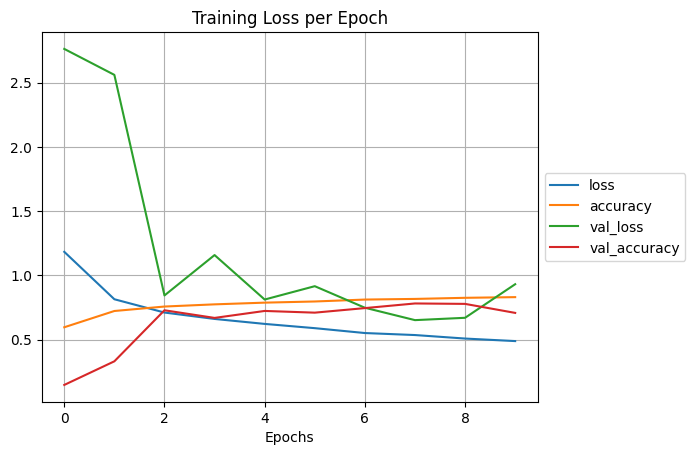

313/313 - 3s - loss: 0.9321 - accuracy: 0.7090 - 3s/epoch - 9ms/step
Test accuracy: 0.7089999914169312
Image Prediction
313/313 [==============================] - 4s 9ms/step


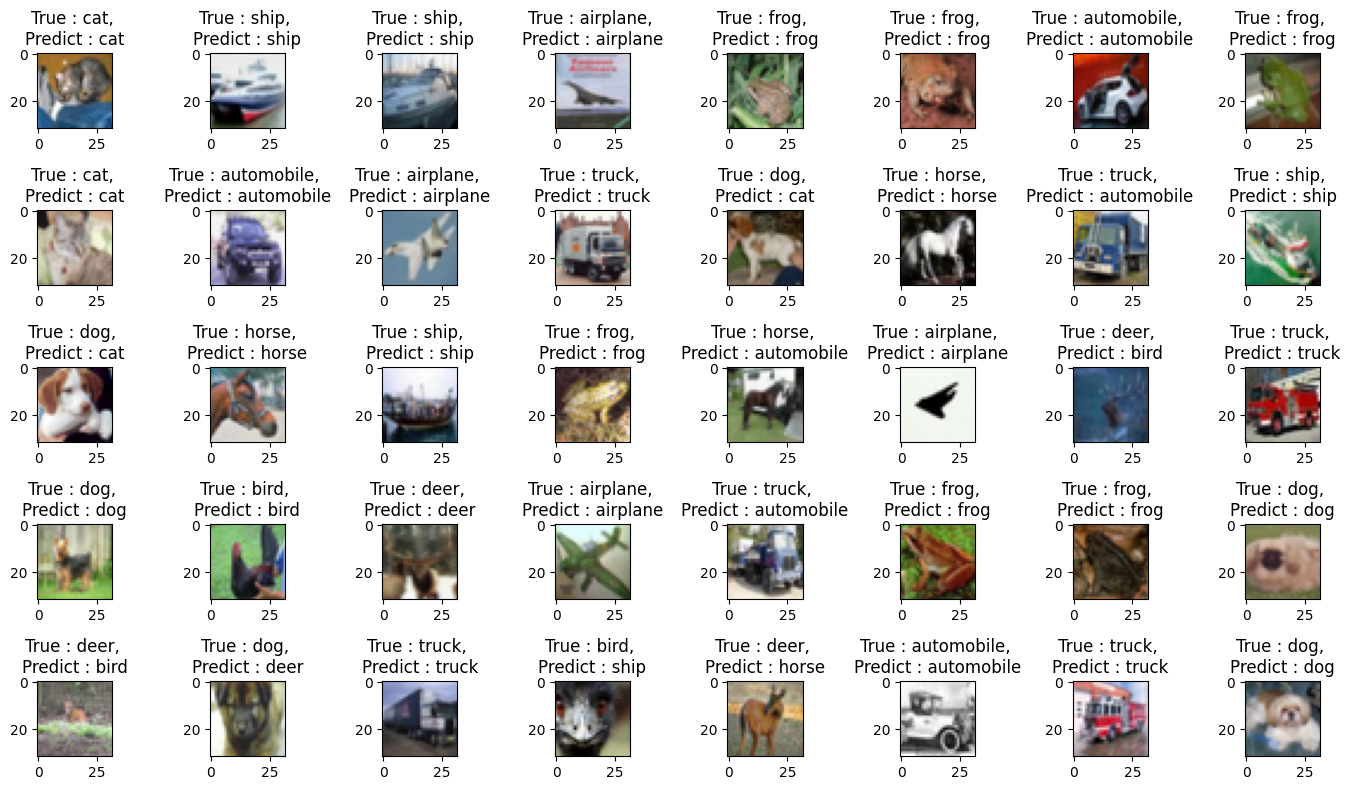

In [ ]:
pretrained_aug_model(ResNet50, X_train, y_train, X_test, y_test,classes)